# Fueling Growth or Fanning Flames? Investigating the Intricate Relationship Between GDP and CO2 Emissions.
> Are the rich responsible for a majority of the CO2 emissions? 

- title: Visualizing the Carbon Footprint Gap
- toc: true
- categories: []
- image: /images/co2.jpg
- type: pbl

# Introduction 

*Intro blurb:*
Climate change and its impact on the planet has become an increasingly pressing issue in recent years. One of the primary contributors to climate change is the release of carbon dioxide (CO2) into the atomsphere, mainly through the burning of fossil fuels for energy. As a result, there is an increased interest in understanding the relationship between a country's exonomic growth (measured in gross domestic product (GDP)) and its CO2 emissions. By analyzing GDP and emission data from a wide variety of countries, this project aims to provide insights into the correlation of economic growth and carbon emissions, and contribute to the ongoing discussion of imposing climate change policy, specifically on larger contributors. 

*Why is CO2 so bad anyways?*
- The release of CO2 into the atmosphere causes heat to be trapped within. This is known as the greenhouse effect. When sunlight reaches the Earth's surface some of the energy is reflected back to space. CO2 present in the atmosphere will intercept this energy causing the CO2 molecule to experience vibrations. The vibrations are caused due to CO2's molecular structure, as it is linear containing one carbon atom and two double-bonded oxygens. This linear arrangement creates polarity, and a strong dipole moment, allowing the molecule to react strongly with EM radiation (absorb a signficant amount of energy). The molecule's absorbed energy transforms into heat. This generated heat is radiated back to the Earth's surface where it contributes to global warming, or the increase of the planet's temperature. This temperature rise leads to a number of climate impacts such as sea level rise, intense and frequent heat waves, severe storms, and changes in precipitation patterns.


# Data

## IMPORTING DATA

In [1]:
# creating sqlite table
import sqlite3
from sqlite3 import Error
import plotly.io as pio
pio.renderers.default = 'iframe'

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn
def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
def main():
    database = "instance/energy.db"

    sql_create_projects_table = """ CREATE TABLE IF NOT EXISTS energy (
                                        id PRIMARY KEY,
                                        country text NOT NULL,
                                        e_type text NOT NULL,
                                        year integer NOT NULL,
                                        gdp integer NOT NULL, 
                                        CO2_emission
                                        Population
                                    ); """
    sql_create_temp_table = """ CREATE TABLE IF NOT EXISTS temp (
                                        country text NOT NULL,
                                        e_type text NOT NULL,
                                        year integer NOT NULL,
                                        gdp integer NOT NULL, 
                                        CO2_emission
                                    ); """

    # create a database connection
    conn = create_connection(database)

    # create tables
    if conn is not None:
        # create projects table
        create_table(conn, sql_create_projects_table)
        create_table(conn, sql_create_temp_table)
    else:
        print("Error! cannot create the database connection.")
if __name__ == '__main__':
    main()

In [2]:
import pandas as pd 

df = pd.read_csv('files/energy.csv', usecols = ['Country','Energy_type','Year','GDP','CO2_emission', 'Population'])
df.to_csv('files/energy1.csv')

In [3]:
# Populate
import sqlite3 as sq
import pandas as pd

connection = sq.connect('instance/energy.db')
 
# Create a cursor object
curs = connection.cursor()
 
student = pd.read_csv('files/energy1.csv')
 
# Write the data to a sqlite db table
student.to_sql('energy', connection, if_exists='replace', index=False)
   
# Run select sql query
curs.execute('select * from energy')
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
     
# Close connection to SQLite database
connection.close()

## CLEANING DATA

In [4]:
# DATA CLEANING

import sqlite3

conn = sqlite3.connect('instance/energy.db')
cursor = conn.cursor()

cursor.execute("DELETE FROM energy WHERE Energy_type <> 'all_energy_types'")

cursor.execute("DELETE FROM energy WHERE Country = 'World'")

cursor.execute("DELETE FROM energy WHERE GDP IS NULL")

conn.commit()

cursor.close()
conn.close()


## XLIST, YLIST, CLIST : READYING DATA FOR VISUAL REPRESENTATION

In [5]:
# x-val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT GDP FROM energy")

# Fetch all rows and store column data in a list
x_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()


In [6]:
# y val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT CO2_emission FROM energy")

# Fetch all rows and store column data in a list
y_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()

In [7]:
# country val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT Country FROM energy")

# Fetch all rows and store column data in a list
c_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()

In [8]:
# population val list
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('instance/energy.db')
c = conn.cursor()

# Execute SQL query to retrieve column data
c.execute("SELECT Population FROM energy")

# Fetch all rows and store column data in a list
p_list = [row[0] for row in c.fetchall()]

# Close database connection
conn.close()

## Visualization 

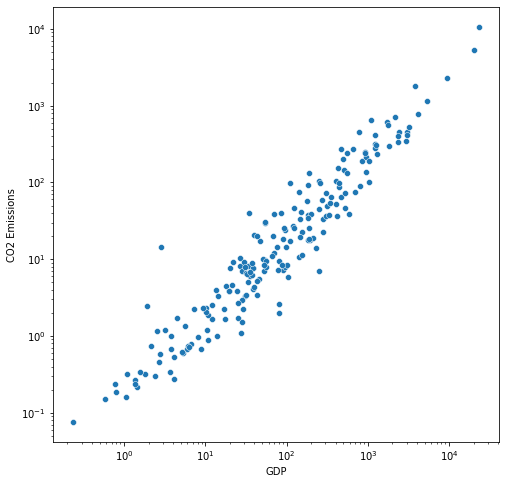

In [9]:
# Graph using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

endb = {
    "Country": c_list,
	"GDP": x_list,
	"CO2 Emissions": y_list,
    "Population": p_list
}
# Control figure size for this notebook:
plt.rcParams['figure.figsize'] = [8, 8]

# data 
data = pd.DataFrame(endb)
 

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="GDP", y="CO2 Emissions",   legend=False, sizes=(20, 2000))
plt.xscale('log')
plt.yscale('log')

# show the graph
plt.show()

Add a line of best fit to understand if GDP and CO2 Emissions are correlated mathematically.

In [10]:
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np
from scipy import stats
# enable Plotly notebook mode
pyo.init_notebook_mode(connected=True)
# create some random data with country names
np.random.seed(1)
x = x_list
y = y_list
# create a scatter plot with a line of best fit
trace = go.Scatter(
    x=x,
    y=y,
    mode='markers',
    name='Data',
    text=c_list, # add country metadata to each data point
    marker=dict(size=10, color=np.arange(len(c_list)), colorscale='Rainbow'),# adjust marker size for better visibility
    hovertemplate = 'Country: %{text}<br>GDP: Billion %{x}$ PPP<br>CO2 Emissions: %{y} MMtonnes'
)
line = go.Scatter(x=x, y=np.poly1d(np.polyfit(x, y, 1))(x), mode='lines', name='Line of Best Fit', line=dict(color='red'))
data = [trace, line]
layout = go.Layout(title="World GDP v.s. CO2 Emissions Data 2019", hovermode='closest', xaxis_title = 'GDP', yaxis_title='CO2 Emissions', ) # enable hover mode for better metadata display
fig = go.Figure(data=data, layout=layout)


# Calculate Regression Stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_squared = r_value**2
print(r_squared)


# display the Plotly figure in the notebook
pyo.iplot(fig)

0.9072619938877866


# Analysis 
*Linear Regressions statistics:* 
- CO2 Emissions = 0.3524*GDP - 47.203
- R^2 = 0.907262

An r^2 value of approximately 0.91 indicates a very strong, positive correlation between Grodd DOmestic Product (GDP) and carbon dioxide emissions (CO2 Emissions). This means that as a country's GDP increases, its COS emissions tend to increase as well. 

However, strong correlation does not necessarily imply causation. While the data suggests that a strong correlation exists between GDP and CO2 emissions of a country, many other factors such as a country's level of industrialization and energy mix could impact both factors. 

# Conclusion, Final Remarks

Nonetheless, the strong correlation between GDP and CO2 emissions highlights the need for effectve climate policies that address the impact of economic growth on the earth. If left unaddressed, CO2 emissions are likely to cause devastatin gimpacts on human populations, ecosystems, and even economies. 

Therefore, policymakers must prioritize developing and implementing strategies to reduce carbon emissions while promoting sustainable economic growth. Measures could include transitioning to renewable energy sources (solar, hydro), promoting energy efficiency, and investing in low-carbon infrastructure. 

**By taking action to address the relationship between GDP and CO2 emissions, we can work towards awareness, and a more sustainable future.**